Initial Data Preview:
   customer_id   age  gender   salary  tenure churn
0          101  25.0    Male    45000      12    No
1          102  34.0  female    52000      24    No
2          103   NaN       M    48000      10   Yes
3          104  45.0  FEMALE  1500000      36    No
4          105  29.0       f    47000       8   Yes

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  22 non-null     int64  
 1   age          18 non-null     float64
 2   gender       22 non-null     object 
 3   salary       22 non-null     int64  
 4   tenure       22 non-null     int64  
 5   churn        22 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ KB
None

Missing values per column:
customer_id    0
age            4
gender         0
salary         0
tenure         0
churn          0
dtype: int64

Du

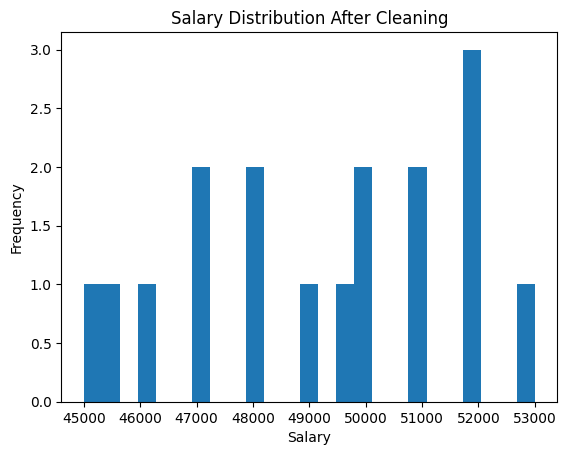


Final missing values:
customer_id    0
age            0
gender         0
salary         0
tenure         0
churn          0
dtype: int64

Final dataset shape: (17, 6)

Cleaned Data Preview:
   customer_id   age  gender  salary  tenure churn
0          101  25.0    Male   45000      12    No
1          102  34.0  Female   52000      24    No
2          103  35.0    Male   48000      10   Yes
4          105  29.0  Female   47000       8   Yes
5          106  41.0    Male   51000      30    No

Cleaned dataset saved as customer_churn_cleaned.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("customer_churn.csv")

print("Initial Data Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())


print("\nMissing values per column:")
print(df.isnull().sum())



median_age = df["age"].median()
df["age"] = df["age"].fillna(median_age)


print("\nDuplicate rows before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after:", df.duplicated().sum())


df["gender"] = df["gender"].str.lower()

df["gender"] = df["gender"].replace({
    "m": "Male",
    "male": "Male",
    "f": "Female",
    "female": "Female"
})

print("\nGender values after cleaning:")
print(df["gender"].value_counts())


Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df["salary"] >= lower_limit) & (df["salary"] <= upper_limit)]


plt.hist(df["salary"], bins=25)
plt.title("Salary Distribution After Cleaning")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


print("\nFinal missing values:")
print(df.isnull().sum())

print("\nFinal dataset shape:", df.shape)
print("\nCleaned Data Preview:")
print(df.head())


df.to_csv("customer_churn_cleaned.csv", index=False)

print("\nCleaned dataset saved as customer_churn_cleaned.csv")
